In [1]:
import sys
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits



def openAsImage(fname):        
    fits_image = fits.open(fname)[0].data
    #img = np.zeros((200,200,3))
    #img2 = np.zeros_like(img)
    #img2[:,:,0] = fits_image
    #img2[:,:,1] = fits_image
    #img2[:,:,2] = fits_image
    #print(fits_image.info())
    return fits_image

In [2]:
import numpy as np
from scipy.stats import poisson

observations = np.array([[0,1,0],[1,2,1],[0,1,0]])
model = np.array([[0,0,0],[0,9,0],[0,0,0]])

def findBrightest(picture):
    m = len(picture[0])
    index = np.argmax(picture)
    i = index // m
    j = index % m
    return([i, j])    


def likelihood(model, observations):
    ll = 1.00
    x = poisson.pmf(observations,model)
    x = (x == 0) + x
    return np.sum(-np.log(x))
            
def sources(model, observations, mask):
    int_cr = 11#34.024
    new_likelihood = int_cr+1
    likelihood0 = 0
    new_mask = mask
    while (new_likelihood - likelihood0 > int_cr):
        observations = np.multiply(observations, new_mask)
        index = findBrightest(observations)
        #print(index)
        likelihood0 = new_likelihood
        mask = new_mask
        new_mask = mask.copy()
        new_mask[index[0], index[1]] = 0
        max_likelihood = - np.inf
        koef = 0
        for k in range(10):
            model[index[0], index[1]] += observations[index[0], index[1]]
            new_likelihood = likelihood(model, observations)
            if max_likelihood < new_likelihood:
                max_likelihood = new_likelihood
                koef = k
        new_likelihood = max_likelihood
        model[index[0], index[1]]=observations[index[0], index[1]] * (k+1)
        #print(new_likelihood)
    return model

    

In [3]:

points_model_map_n = openAsImage("/media/masha/Maxtor/database3/sky226_coord_ra21.5380900234_dec-29.5174035558_points_model_map.fits.noisy")
back_model_map_n = openAsImage("/media/masha/Maxtor/database3/sky226_coord_ra21.5380900234_dec-29.5174035558_back_model_map.fits.noisy")
observations = points_model_map_n + back_model_map_n

points_model_map = openAsImage("/media/masha/Maxtor/database3/sky226_coord_ra21.5380900234_dec-29.5174035558_points_model_map.fits")
back_model_map = openAsImage("/media/masha/Maxtor/database3/sky226_coord_ra21.5380900234_dec-29.5174035558_back_model_map.fits")
nonoise = points_model_map + back_model_map
points_deconv_map = openAsImage("/media/masha/Maxtor/database3/sky226_coord_ra21.5380900234_dec-29.5174035558_points_deconvolved_map.fits")
back_deconv_map = openAsImage("/media/masha/Maxtor/database3/sky226_coord_ra21.5380900234_dec-29.5174035558_back_deconvolved_map.fits")
answer = points_deconv_map  + back_deconv_map

model = np.zeros(observations.shape)


In [4]:
sources(model, observations, np.ones((len(observations), len(model))))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

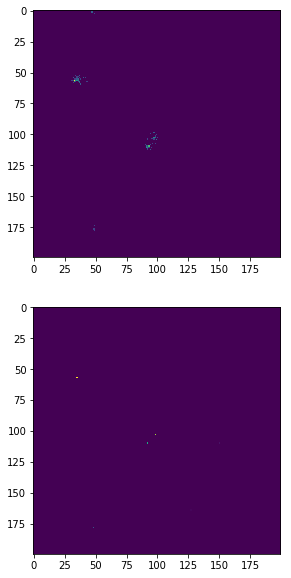

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(model)
plt.subplot(212)
plt.imshow(points_deconv_map)
plt.show()
